# Graficación de la dinámica
© 2020
Víctor A. Bettachini  
Mecánica General  
Departamento de Ingeniería e Investigación Tecnológica  
Universidad Nacional de La Matanza    

--- 

Adaptado de: https://youtu.be/je8GW3aqmzc

# Oscilador armónico amortiguado
![](ThePhysicsOfTheDampedHarmonicOscillatorExample_02.png)

Supongamos que tenemos la solución 
$$
x(t) = \operatorname{e}^{- \beta t} \left( A \cos(\omega t) + B \sin(\omega t) \right),
$$
para los que conocemos las condiciones iniciales
$$
x(0) = 10 \\
v(0) = 2
$$
y los parámetros son
$$
\beta = 0.2\,\mathrm{\frac{1}{s}} \\
k = 30 \,\mathrm{\frac{N}{m}} \\
m = 1\,\mathrm{kg}
$$

# Escribiendo las ecuaciones en forma simbólica

In [13]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

In [14]:
# defino los símbolos a utilizar
beta, k, m, omega = sym.symbols(' beta, k, m, omega ', positive= True)
A, B, t = sym.symbols('A, B, t') 

# la función x(t)
x_t = sym.exp(- beta* t)* (A* sym.cos(omega* t) + B* sym.sin(omega* t) )
x, x0, v0 = sym.symbols('x, x_0, v_0') 
sym.Eq(x, x_t)

Estableciendo las condiciones iniciales $x_0, v_0$ como 

$$
\left\{
  \begin{array}{l}
      x(t=0) = x_0\\
      \dot{x}(t=0)= v_0
  \end{array},
\right.
$$
basta resolver este sistema de ecuaciones para obtener expresiones de $A,B$.

In [15]:
# soluciones
# solve | resuelve un sistema algebráico, asume que igual a 0, si es un sistema requiere una lista []
# subs | substituye una variable por otra o un valor
sols = sym.solve([x_t.subs(t,0)- x0, x_t.diff(t).subs(t,0)- v0])  # sistema x y x punto igualados a sus condiciones iniciales 
sols

In [17]:
x_AB = x_t.subs(sols[0]) # substituye con la primer y única solución en el diccionario [0] que devolvió solve
sym.Eq(x, x_AB)

## Expresión numérica

### Parámetros físicos

In [44]:
# escribo los valores de los parámetros físicos
beta_valor = 0.2 # [s-1]
k_valor = 30 # [N m-1]
m_valor = 1 # [kg]
omega_valor = np.sqrt(k_valor/ m_valor) # [s-1]
x0_valor = 0.5 # [m]
v0_valor = 5 # [m s-1]

# un diccionario (un tipo de variable Python) fácilará el reemplazar con valores numéricos
valores = {
    beta : beta_valor,
    k : k_valor,
    m : m_valor,
    omega : omega_valor,
    x0 : x0_valor,
    v0 : v0_valor
}

In [45]:
x_valores = x_AB.subs(sols[0]).subs(valores)
x_valores

### Conversión sympy -> numpy 
La anterior es una expresión _sympy_, necesito pasarla a una expresión que pueda interpretarse fuera de este módulo.
Esto lo hace la función _lambdify_ que retorna una función para el módulo indicado, por defecto _numpy_, en función de la variable indicada.

In [46]:
x_numerica = sym.lambdify(t, x_valores) # variable t

In [47]:
x_numerica(1) # i.e. a t= 1 s

## Graficación

In [48]:
# bibliotecas de cálculo numérico y graficación
import numpy as np
import matplotlib.pyplot as plt

In [49]:
tiempos = np.arange(0,10,0.05) # matriz unidimensional (vector) con tiempos de interés

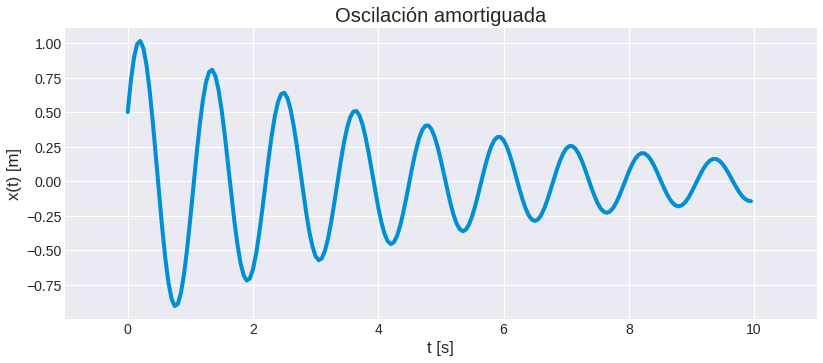

In [52]:
# Referencia: https://matplotlib.org/3.2.1/tutorials/introductory/lifecycle.html
plt.style.use('seaborn-darkgrid') # un atrayente estilo
# plt.style.use('fivethirtyeight') # otro estilo
fig, ax = plt.subplots(figsize=(12, 5))
ax.set(xlim=[-1, 11], xlabel='t [s]', ylabel='x(t) [m]',
       title='Oscilación amortiguada') # rango de tiempos y título
ax.plot(tiempos, x_numerica(tiempos)) # la graficación en sí